In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[10,5]
plt.rcParams['figure.dpi']=150
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.duplicated().sum()

24

In [5]:
df.describe() #Outliers are present, huge gap between 75% and max

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.describe(include=object)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#Scaling the data


In [8]:
# Assuming 'numeric_only' should contain the names of numerical columns
from sklearn.preprocessing import StandardScaler
numeric_only = df.select_dtypes(include=['number']).columns
sc=StandardScaler()
# Apply scaling to only the numeric columns
sc.fit_transform(df[numeric_only])
df_scaled=pd.DataFrame(sc.fit_transform(df[numeric_only]),columns=df[numeric_only].columns)
df_scaled
df=pd.concat([df_scaled,df.select_dtypes(include=object)],axis=1)
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


StandardScaling is used as data has range of -3 to 3 which is best for predicting y variable rather than MinMaxSacling which has a range of 0 to 1

In [9]:
#As categorical columns are more than 5, we are using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.select_dtypes(include=object):
  df[i]=le.fit_transform(df[i].astype(str))
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,7,9,4,1,1,4,1,39,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,6,9,2,4,0,4,1,39,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4,11,0,6,1,4,1,39,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4,1,2,6,0,2,1,39,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,2,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,4,7,2,13,5,4,0,39,0
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,4,11,2,7,0,4,1,39,1
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,4,11,6,1,4,4,0,39,0
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,4,11,4,1,3,4,1,39,0


In [10]:
df.isna().sum()

,0
age,0
fnlwgt,0
education_num,0
capital_gain,0
capital_loss,0
hours_per_week,0
workclass,0
education,0
marital_status,0
occupation,0


In [11]:
df.duplicated().sum()

24

In [12]:
df[df.duplicated(keep=False)]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
2303,3.769612,-1.301701,-0.031360,-0.14592,-0.21666,-0.440378,4,15,4,8,1,1,1,39,0
3917,-1.435581,0.585520,-0.031360,-0.14592,-0.21666,-2.141163,4,15,4,8,3,4,1,39,0
4325,-0.995706,1.121435,1.134739,-0.14592,-0.21666,-0.035429,4,9,4,3,1,4,1,26,0
4767,-1.288956,0.571043,-0.031360,-0.14592,-0.21666,-2.465122,4,15,4,10,3,4,0,39,0
4881,-0.995706,1.121435,1.134739,-0.14592,-0.21666,-0.035429,4,9,4,3,1,4,1,26,0
4940,-0.042642,0.165077,-0.420060,-0.14592,-0.21666,0.612489,4,11,2,7,0,4,1,39,1
5104,3.769612,-1.301701,-0.031360,-0.14592,-0.21666,-0.440378,4,15,4,8,1,1,1,39,0
5579,-0.849080,0.623445,-0.420060,-0.14592,-0.21666,-0.035429,4,11,4,7,1,4,0,39,0
5805,-1.362269,-0.778035,-0.031360,-0.14592,-0.21666,-2.465122,4,15,4,13,1,4,0,39,0
5842,-0.995706,0.058889,-3.140957,-0.14592,-0.21666,-0.035429,4,3,4,9,1,4,0,13,0


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  float64
 1   fnlwgt          32537 non-null  float64
 2   education_num   32537 non-null  float64
 3   capital_gain    32537 non-null  float64
 4   capital_loss    32537 non-null  float64
 5   hours_per_week  32537 non-null  float64
 6   workclass       32537 non-null  int64  
 7   education       32537 non-null  int64  
 8   marital_status  32537 non-null  int64  
 9   occupation      32537 non-null  int64  
 10  relationship    32537 non-null  int64  
 11  race            32537 non-null  int64  
 12  sex             32537 non-null  int64  
 13  native_country  32537 non-null  int64  
 14  income          32537 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 4.0 MB


Pros and Cons of OHE and LabelEncoder
1. LabelEncoder is used for labelling y variable. It creates only one columns mentioning uniques values of the columns as label.For ex: A column has 3 unique values then it is encoded to [0,1,2].
2. One Hot Encoding is used for labelling x variable. It creates multiple columns according to the unique values in the main column. It creates binary values representing true or false i.e[0,1].

Therefore when the no of features is more, we use labelencoder.

In [15]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,0.000286,0.000024,0.000441,0.000108,0.000160,0.000233,3.868734,10.297507,2.611427,6.572856,1.446538,3.665827,0.669238,36.721579,0.240926
std,0.999836,1.000077,0.999593,1.000376,1.000367,0.999972,1.456445,3.870142,1.506301,4.229521,1.607064,0.848847,0.470495,7.820732,0.427652
min,-1.582206,-1.681631,-3.529656,-0.145920,-0.216660,-3.194030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.775768,-0.681691,-0.420060,-0.145920,-0.216660,-0.035429,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,39.000000,0.000000
50%,-0.115955,-0.108219,-0.031360,-0.145920,-0.216660,-0.035429,4.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,39.000000,0.000000
75%,0.690484,0.447327,0.746039,-0.145920,-0.216660,0.369519,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,39.000000,0.000000
max,3.769612,12.268563,2.300838,13.394578,10.593507,4.742967,8.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41.000000,1.000000


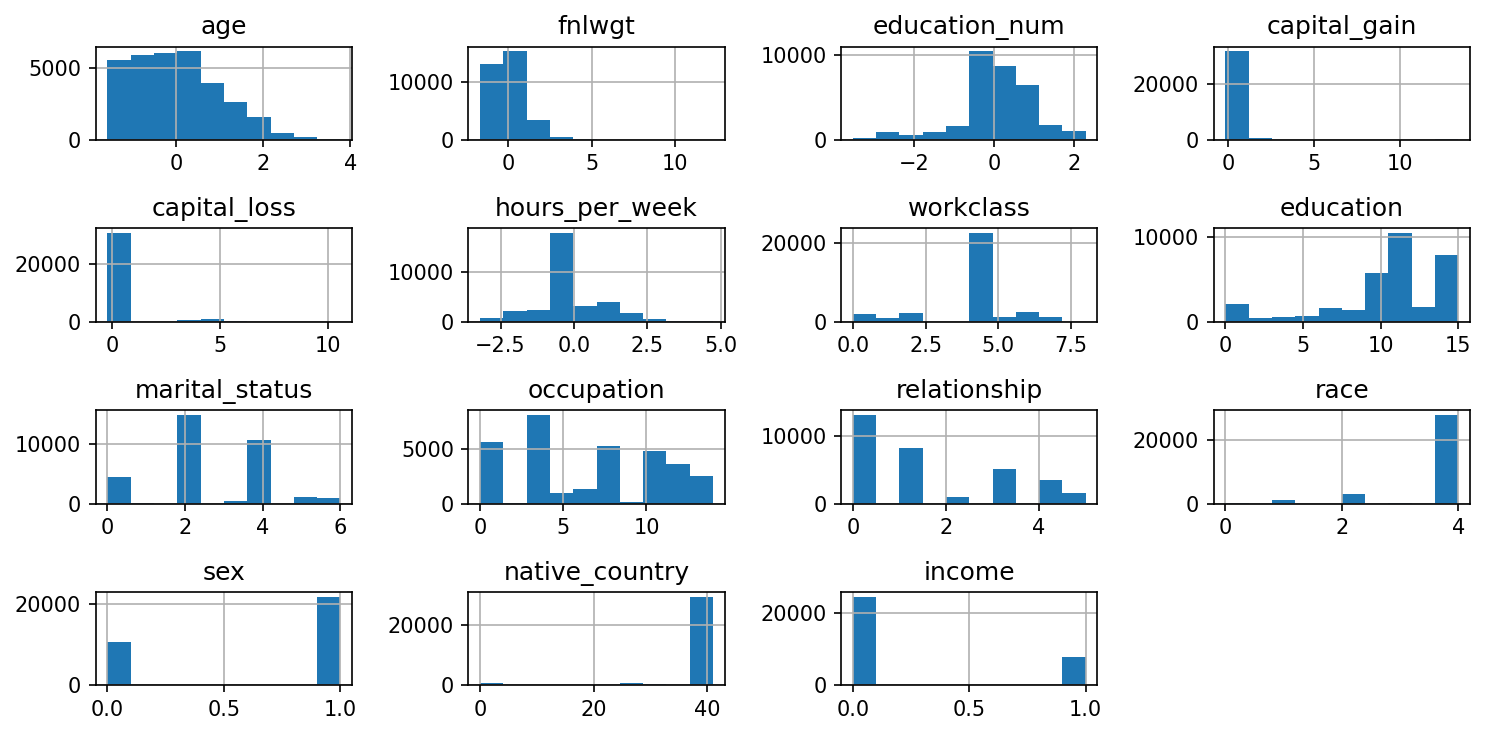

In [16]:
df.hist()
plt.tight_layout()
plt.show()

In [17]:
df['age'].skew()

0.5576631514973129

<Axes: >

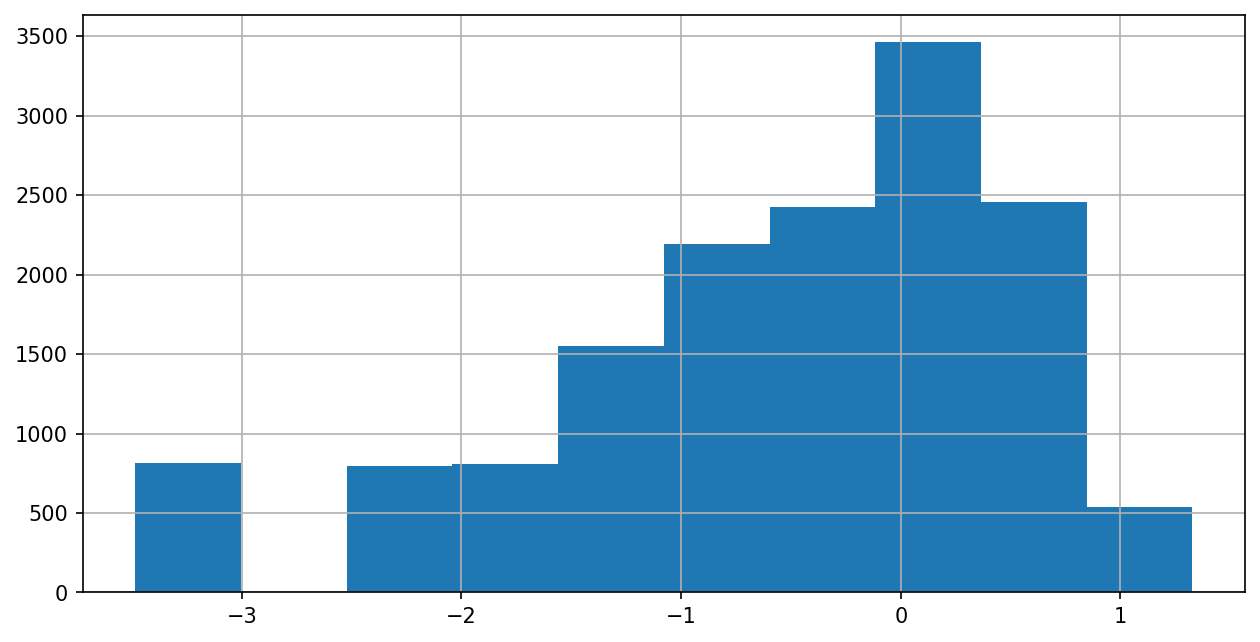

In [18]:
df['age']=np.log(df['age'])
df['age'].hist()

In [19]:
df['age'].skew()

-1.0574026412137267

We can see the changes after applying log transformation.The skewness has been reduced.

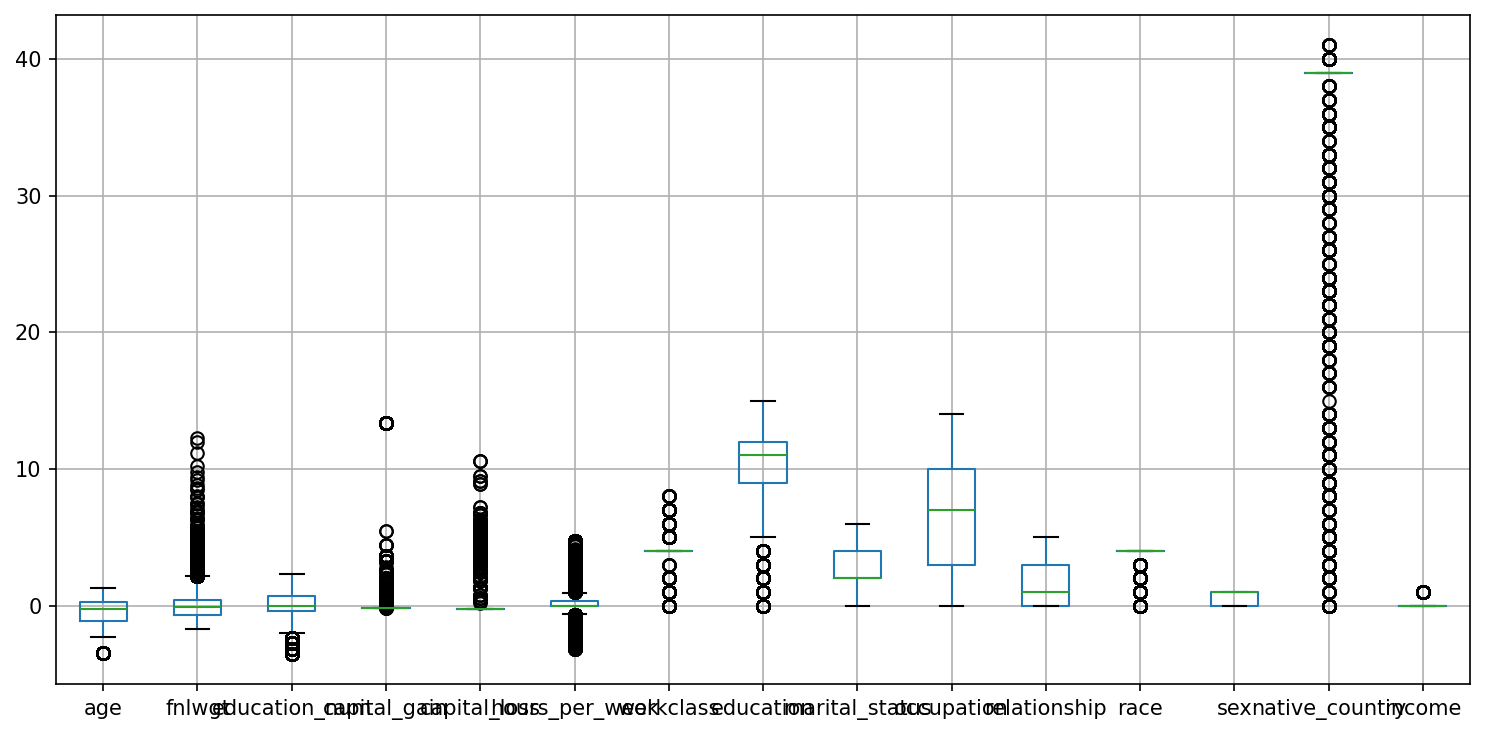

In [20]:
df.boxplot()
plt.tight_layout()
plt.show()

There are outliers present in many features. Therefore to detect these outliers we are using Isolation forest method.

In [21]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(random_state=10,contamination=0.1)
iso.fit(df)

IsolationForest(contamination=0.1, random_state=10)

In [22]:
y=iso.predict(df)
y

array([ 1,  1,  1, ...,  1,  1, -1])

In [23]:
df['anamoly']=iso.predict(df.iloc[  :,:])
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income,anamoly
0,-3.484452,-1.063611,1.134739,0.148453,-0.21666,-0.035429,7,9,4,1,1,4,1,39,0,1
1,-0.177801,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,6,9,2,4,0,4,1,39,0,1
2,NaN,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4,11,0,6,1,4,1,39,0,1
3,0.055479,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4,1,2,6,0,2,1,39,0,1
4,NaN,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,2,0,5,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,NaN,0.639741,0.746039,-0.145920,-0.21666,-0.197409,4,7,2,13,5,4,0,39,0,1
32557,-2.263526,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,4,11,2,7,0,4,1,39,1,1
32558,0.353196,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,4,11,6,1,4,4,0,39,0,1
32559,NaN,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,4,11,4,1,3,4,1,39,0,1


In [24]:
df[df['anamoly']==-1]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income,anamoly
4,NaN,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,2,0,5,0,-1
6,-0.269454,-0.280358,-1.974858,-0.145920,-0.21666,-1.979184,4,6,3,8,1,2,0,23,0,-1
11,NaN,-0.459328,1.134739,-0.145920,-0.21666,-0.035429,7,9,2,10,0,1,1,19,1,-1
14,-2.263526,-0.644315,0.357340,-0.145920,-0.21666,-0.035429,4,8,2,3,0,1,1,0,1,-1
15,NaN,0.527802,-2.363558,-0.145920,-0.21666,0.369519,4,5,2,14,0,0,1,26,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,0.865702,0.924634,2.300838,-0.145920,-0.21666,-2.465122,0,10,2,0,0,4,1,39,1,-1
32541,-1.729936,0.123580,-0.420060,-0.145920,-0.21666,-0.683348,0,11,5,0,1,2,0,39,0,-1
32545,-3.484452,-0.741645,0.746039,-0.145920,-0.21666,-1.655225,2,7,2,1,5,4,0,39,1,-1
32551,NaN,-1.475270,-1.586158,-0.145920,-0.21666,-0.035429,4,0,2,6,0,0,1,39,0,-1


In [25]:
#PPS score
!pip install ppscore

In [26]:
import ppscore as pps
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.000000,1.000000,None
1,age,fnlwgt,0.0,regression,True,mean absolute error,0.690278,0.698196,DecisionTreeRegressor()
2,age,education_num,0.0,regression,True,mean absolute error,0.828397,0.859046,DecisionTreeRegressor()
3,age,capital_gain,0.0,regression,True,mean absolute error,0.215279,0.383668,DecisionTreeRegressor()
4,age,capital_loss,0.0,regression,True,mean absolute error,0.284597,0.539057,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
251,anamoly,race,0.0,regression,True,mean absolute error,0.323000,0.510186,DecisionTreeRegressor()
252,anamoly,sex,0.0,regression,True,mean absolute error,0.325800,0.432870,DecisionTreeRegressor()
253,anamoly,native_country,0.0,regression,True,mean absolute error,2.213600,3.492676,DecisionTreeRegressor()
254,anamoly,income,0.0,regression,True,mean absolute error,0.247400,0.368085,DecisionTreeRegressor()


In [27]:
df=pd.DataFrame(pps.matrix(df))
df[df.case!='predict_itself'].iloc[:,[0,1,2,3,5,8]].sort_values('ppscore',ascending=False)

,x,y,ppscore,case,metric,model
39,education_num,education,1.000000,regression,mean absolute error,DecisionTreeRegressor()
114,education,education_num,1.000000,regression,mean absolute error,DecisionTreeRegressor()
168,relationship,marital_status,0.299790,regression,mean absolute error,DecisionTreeRegressor()
150,occupation,workclass,0.211609,regression,mean absolute error,DecisionTreeRegressor()
172,relationship,sex,0.201742,regression,mean absolute error,DecisionTreeRegressor()
...,...,...,...,...,...,...
91,hours_per_week,race,0.000000,regression,mean absolute error,DecisionTreeRegressor()
92,hours_per_week,sex,0.000000,regression,mean absolute error,DecisionTreeRegressor()
93,hours_per_week,native_country,0.000000,regression,mean absolute error,DecisionTreeRegressor()
94,hours_per_week,income,0.000000,regression,mean absolute error,DecisionTreeRegressor()
